############# 1. Caracteristicas: 12 ###############
############# 2. Division de datos #############
TRAIN: [  7796 125997 128659 ...  86037 124109  49000] TEST: [ 55076   4502  32946 ... 100259  97820  76556] 

TRAIN: [113815  83804  50153 ...  41483  16120  43324] TEST: [  5501  81943 108306 ...  68954  53393 109653] 

TRAIN: [ 14448  86609 119950 ... 107651 133072   9240] TEST: [77429 65710 19312 ... 61056 64365 90679] 

TRAIN: [124218  76780  46969 ... 123532  67381  49343] TEST: [ 7411 56756 44347 ... 17245  3822   788] 

TRAIN: [130574  12785  24997 ...  29575  74460  72186] TEST: [110946  84715 127594 ...  72033  90596  51781] 

############ 3->4. Entrenando modelo #############
############ 5. Metricas del modelo #############
Accuracy: 62.521929824561404 
Precision: 70.96657225886374 
Recall: 62.521929824561404 
F1-Score: 59.62341377076614


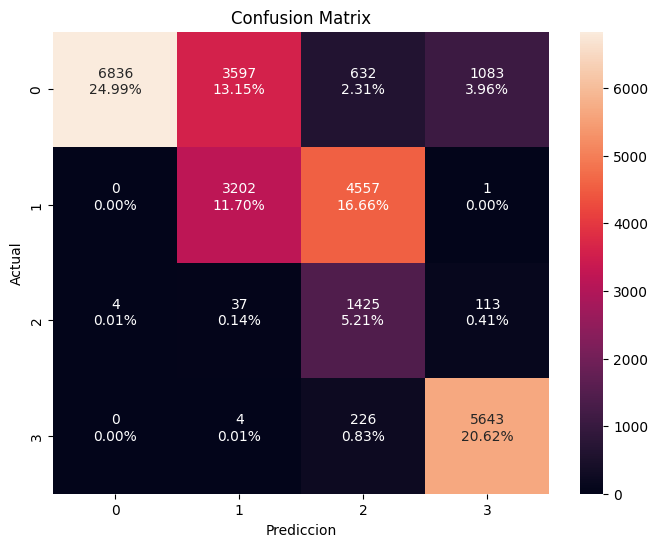

              precision    recall  f1-score   support

           0       1.00      0.56      0.72     12148
           1       0.47      0.41      0.44      7760
           2       0.21      0.90      0.34      1579
           3       0.82      0.96      0.89      5873

    accuracy                           0.63     27360
   macro avg       0.63      0.71      0.60     27360
weighted avg       0.77      0.63      0.65     27360

################## 6. Validar resultados de Modelo ####################
Accuracy:  62.354714912280706
Precision:  73.48081803984871
Recall:  62.354714912280706
F1-Score:  59.73028203866358


In [1]:
#----------------------------------------LIBRERIAS
import pandas as pd
import numpy as np
"""graficas"""
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
"""preprocesar"""
from sklearn.preprocessing import StandardScaler, label_binarize
"""dividir datos"""
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
"""validar modelo"""
from sklearn.model_selection import validation_curve, StratifiedKFold, GridSearchCV, cross_validate
"""metricas de evaluacion"""
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, roc_curve, auc, make_scorer
"""modelos ML"""
from sklearn.naive_bayes import GaussianNB

#----------------------------------------FUNCIONES
""" crear Funcion para matriz de confusion """
def crearMatriz_confusion(y_pred,y_test):
    cm= confusion_matrix(y_pred, y_test)
    plt.figure(figsize = (8,6))
    values = ["{0:0.0f}".format(x) for x in cm.flatten()]
    """ calcular y obtener valores"""
    percentages = ["{0:.2%}".format(x) for x in cm.flatten()/np.sum(cm)]
    combined = ["{}\n{}\n".format(j, k) for j, k in zip(values, percentages)]
    combined = np.asarray(combined).reshape(4,4)
    """crear matriz"""
    b = sns.heatmap(cm, annot=combined, fmt="")
    """etiquetas"""
    b.set(title='Confusion Matrix')
    b.set(xlabel='Prediccion', ylabel='Actual',)
    #plt.savefig('matrizconfusionDT_final.png')
    plt.show()

"""crear funcion para encontrar metricas del modelo """
def encontrar_metricas(y_test,y_pred):
    """ encontrar la precision del general del modelo"""
    accuracy = accuracy_score(y_test, y_pred)*100
    precision_ma = precision_score(y_test, y_pred, average='weighted')*100
    recall_ma = recall_score(y_test, y_pred, average='weighted')*100
    f1score_ma = f1_score(y_test, y_pred, average='weighted')*100
    return print('Accuracy: %s \nPrecision: %s \nRecall: %s \nF1-Score: %s' %(accuracy, precision_ma, recall_ma, f1score_ma))


#---------------------------------------- SELECCION DE DATOS
df_traffic = pd.read_csv('../../../araData/Z/balance_total4clases_34200.csv', low_memory=False)
"""matriz de caracteristicas"""
caracteristicas = ['Dur','protoTcp','protoUdp','portSystem','portUser','portDynamic','TotPkts', 'SrcPkts', 'DstPkts', 
                    'TotBytes', 'SrcBytes', 'DstBytes']
print("############# 1. Caracteristicas: %s ###############" %len(caracteristicas) )

"""seleccion de variables"""
X= df_traffic[caracteristicas].values
y=df_traffic.iloc[:,-1].values

print("############# 2. Division de datos #############")
"""division de datos"""

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
for train_index, test_index in sss.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index,"\n")
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1 )
"""estandarizar datos"""
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


#----------------------------------------MODELO
print("############ 3->4. Entrenando modelo #############")

"""validacion cruzada"""
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_pred  = clf_gnb.predict(X_test)

#----------------------------------------METRICAS Y EVALUACION
print("############ 5. Metricas del modelo #############")
""" metricas"""
encontrar_metricas(y_test,y_pred)
crearMatriz_confusion(y_pred,y_test)
print(classification_report(y_pred,y_test))#ver nro de instancias por clase

print('################## 6. Validar resultados de Modelo ####################')
score = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score, average='weighted'),
         'recall': make_scorer(recall_score, average='weighted'),'f1_score': make_scorer(f1_score, average= 'weighted')}

eval_resultado = cross_validate(estimator=clf_gnb, X=X_train, y=y_train, cv=skf, scoring=score)
print('Accuracy: ',  (np.mean(eval_resultado['test_accuracy'])*100))
print('Precision: ', (np.mean(eval_resultado['test_precision'])*100))
print('Recall: ', (np.mean(eval_resultado['test_recall'])*100))
print('F1-Score: ', (np.mean(eval_resultado['test_f1_score'])*100))